In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

warnings.filterwarnings("ignore")
zip_path = "city_day.csv.zip"  # <-- put your path here

with zipfile.ZipFile(zip_path, "r") as zf:
    csv_name = [n for n in zf.namelist() if n.endswith(".csv")][0]
    with zf.open(csv_name) as f:
        df = pd.read_csv(f)

print(f"Loaded {csv_name} with shape {df.shape}")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['PM2.5', 'PM10', 'NO2', 'AQI'])
city_data = df[df['City'] == 'Delhi'].copy()
city_data['AQI'] = city_data['AQI'].astype(float)
city_data['Month'] = city_data['Date'].dt.month


sns.set(style="whitegrid", palette="muted")

Loaded city_day.csv with shape (29531, 16)
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


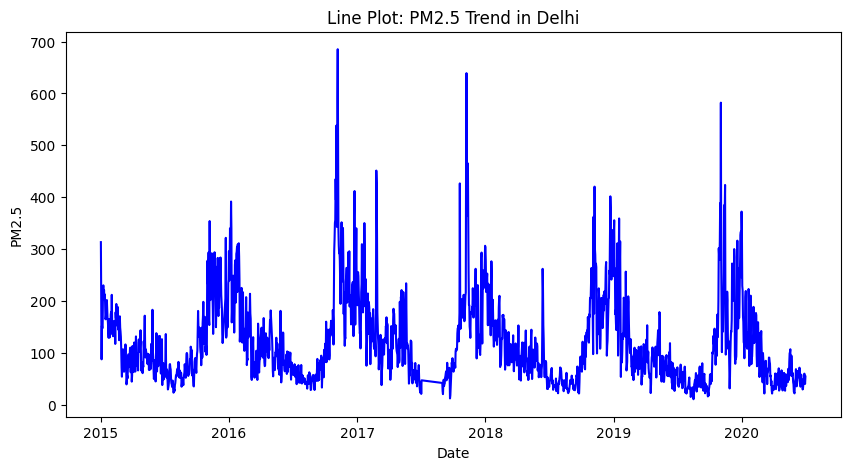

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='PM2.5', data=city_data, color='b')
plt.title('Line Plot: PM2.5 Trend in Delhi')
plt.show()

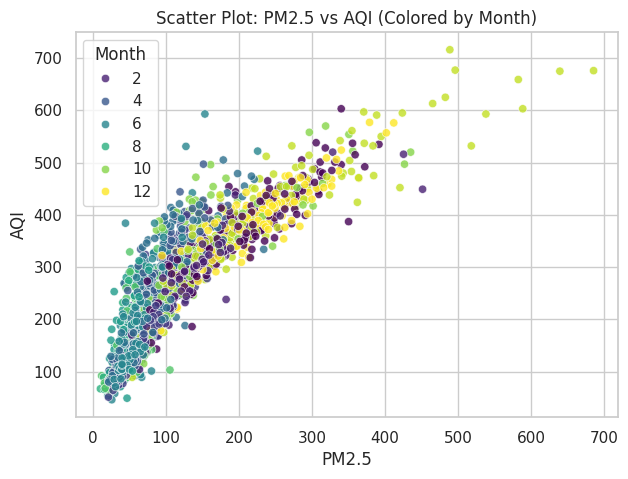

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='PM2.5', y='AQI', data=city_data, hue='Month', palette='viridis', alpha=0.8)
plt.title('Scatter Plot: PM2.5 vs AQI (Colored by Month)')
plt.show()

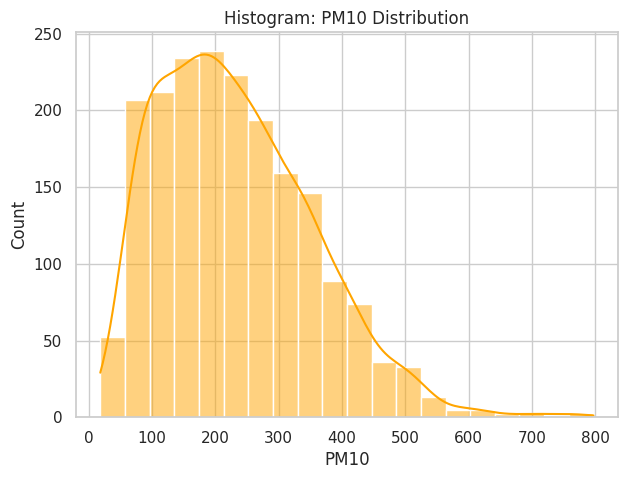

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(city_data['PM10'], bins=20, kde=True, color='orange')
plt.title('Histogram: PM10 Distribution')
plt.show()

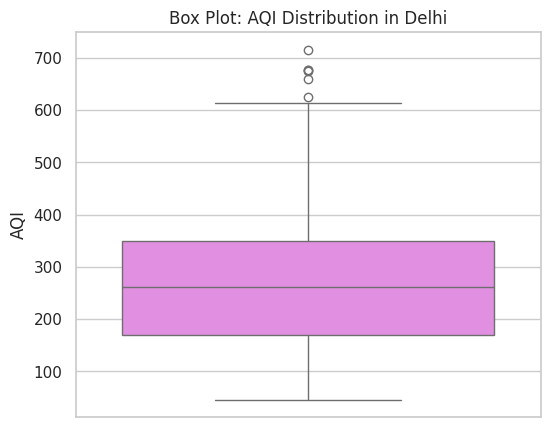

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(y='AQI', data=city_data, color='violet')
plt.title('Box Plot: AQI Distribution in Delhi')
plt.show()

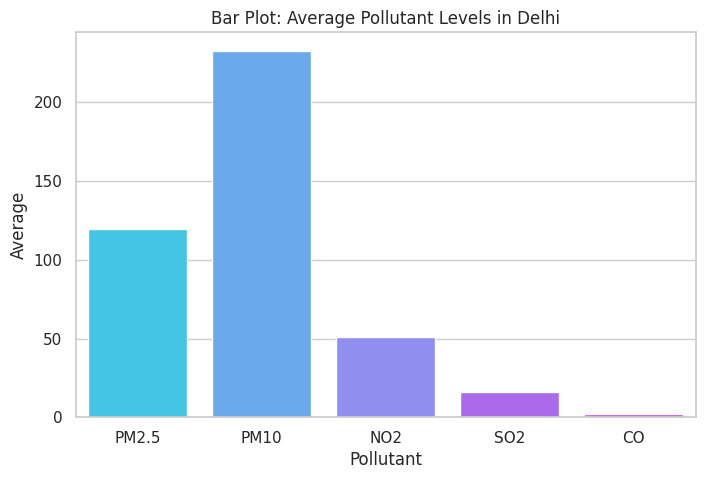

In [12]:
avg_pollutants = city_data[['PM2.5','PM10','NO2','SO2','CO']].mean().reset_index()
avg_pollutants.columns = ['Pollutant', 'Average']
plt.figure(figsize=(8,5))
sns.barplot(x='Pollutant', y='Average', data=avg_pollutants, palette='cool')
plt.title('Bar Plot: Average Pollutant Levels in Delhi')
plt.show()

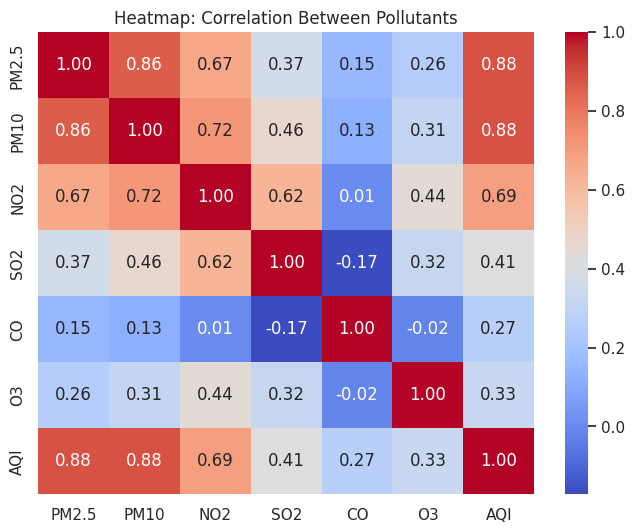

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(city_data[['PM2.5','PM10','NO2','SO2','CO','O3','AQI']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation Between Pollutants')
plt.show()

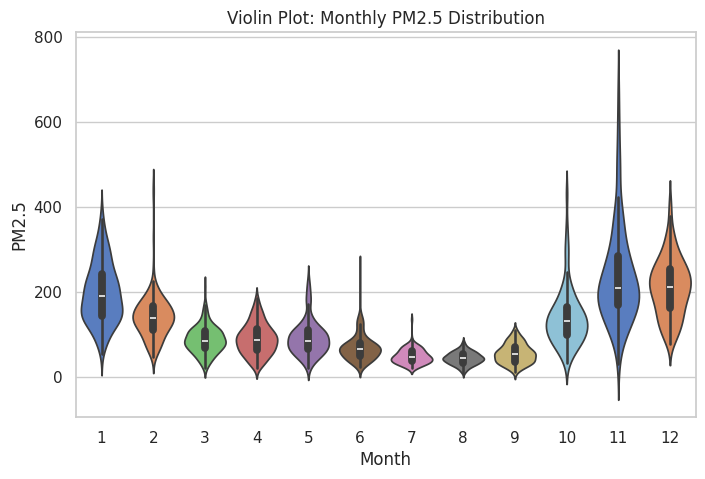

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Month', y='PM2.5', data=city_data, palette='muted')
plt.title('Violin Plot: Monthly PM2.5 Distribution')
plt.show()

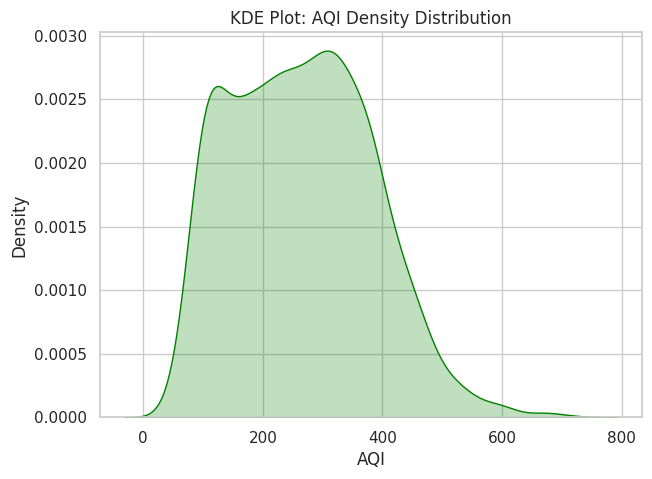

In [15]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=city_data, x='AQI', fill=True, color='green')
plt.title('KDE Plot: AQI Density Distribution')
plt.show()

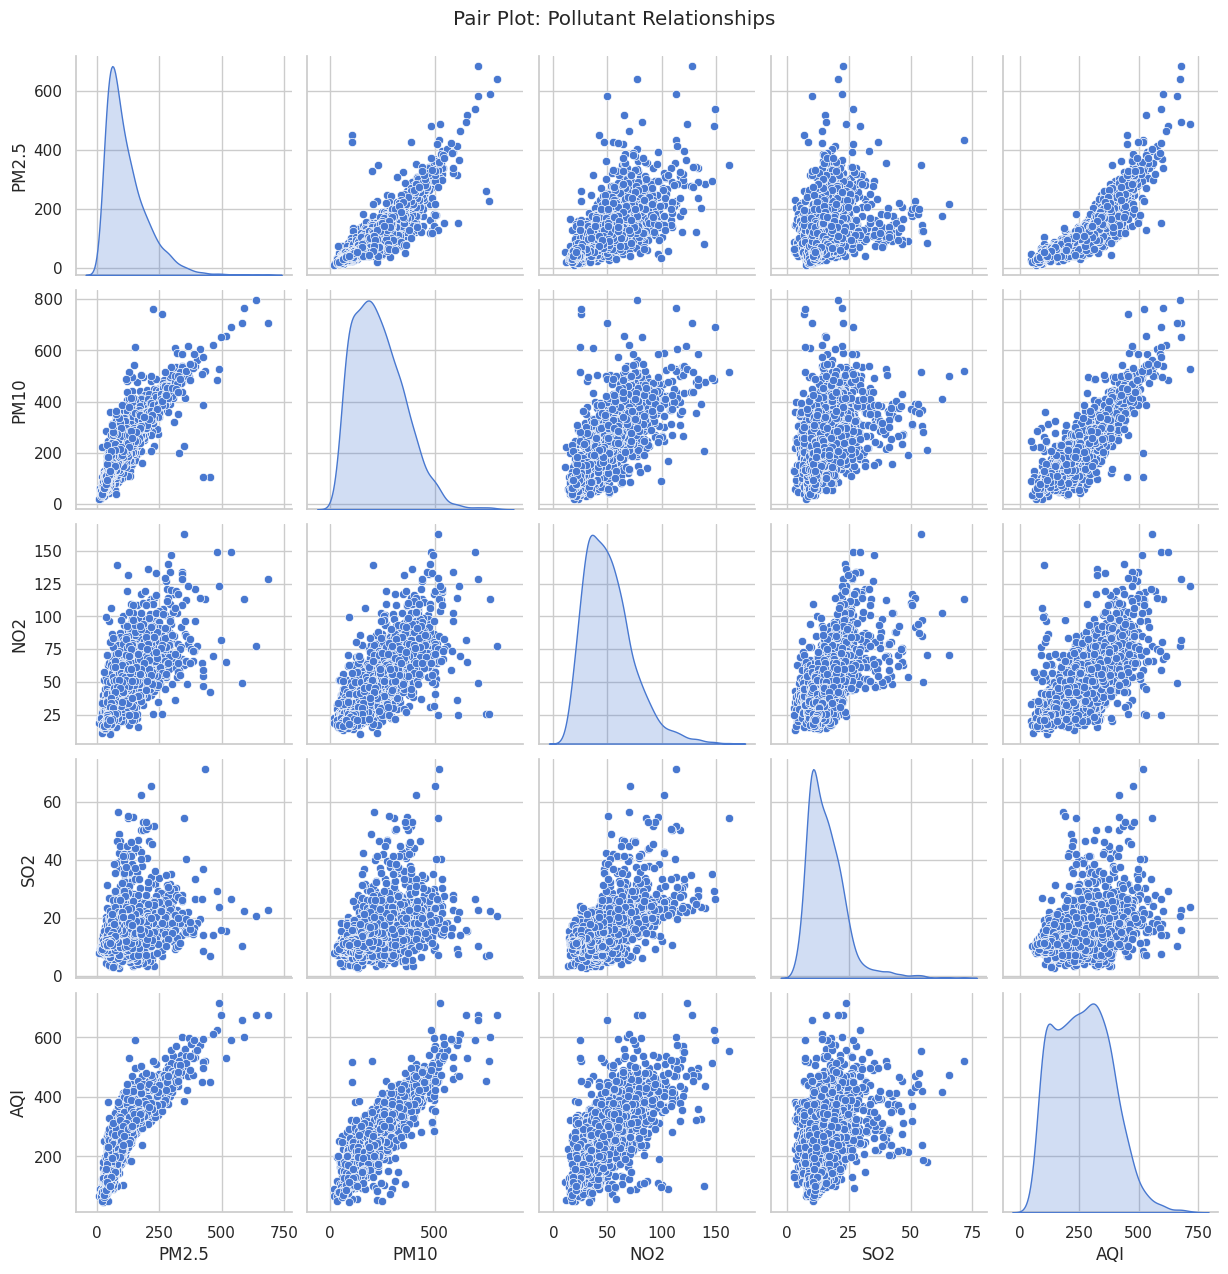

In [16]:
sns.pairplot(city_data[['PM2.5','PM10','NO2','SO2','AQI']], diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot: Pollutant Relationships', y=1.02)
plt.show()

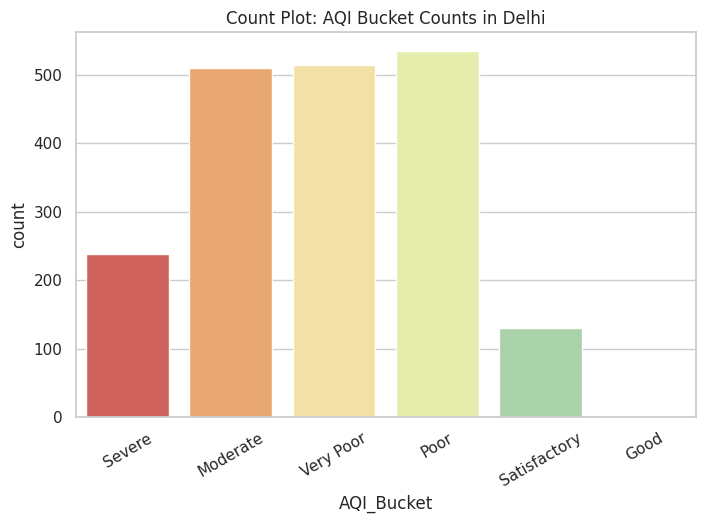

In [17]:
if 'AQI_Bucket' in city_data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='AQI_Bucket', data=city_data, palette='Spectral')
    plt.title('Count Plot: AQI Bucket Counts in Delhi')
    plt.xticks(rotation=30)
    plt.show()
else:
    print("Column 'AQI_Bucket' not found in dataset.")